In [3]:
from google.colab import files

uploaded = files.upload()

Saving Beer Train Data Set.csv to Beer Train Data Set.csv


In [0]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('Beer Train Data Set.csv')
df=pd.DataFrame.copy(train)

In [6]:
train.describe()

,ABV,Brewing Company,Beer Name,Score
count,170513.000000,185643.000000,185643.000000,185643.000000
mean,6.354961,7008.757659,83738.220111,3.198432
std,1.907205,3914.168053,48520.065146,1.358862
min,0.010000,0.000000,0.000000,0.000000
25%,5.000000,3825.000000,41232.500000,3.270000
50%,6.000000,7111.000000,83335.000000,3.710000
75%,7.200000,10402.000000,125148.500000,3.970000
max,80.000000,13541.000000,168534.000000,5.000000


In [7]:
train.head(10)

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73
5,7.4,3380,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",9936,1,MaibockHellesBock,40-45,45-50,3.86
6,3.0,12514,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",43741,15,EnglishBrownAle,40-45,45-50,3.77
7,5.5,2768,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",146548,6,AmericanIPA,40-45,45-50,3.67
8,6.5,11109,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",135318,4,AmericanIPA,40-45,45-50,3.97
9,11.3,13104,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",144620,12,AmericanDoubleImperialStout,45-50,50-55,4.24


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 10 columns):
ABV                    170513 non-null float64
Brewing Company        185643 non-null int64
Food Paring            185643 non-null object
Glassware Used         185643 non-null object
Beer Name              185643 non-null int64
Ratings                185643 non-null object
Style Name             185643 non-null object
Cellar Temperature     178862 non-null object
Serving Temperature    185450 non-null object
Score                  185643 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [9]:
#duplicated rows
train.duplicated().sum()

5874

In [10]:
#Deleting duplicate rows
train.drop_duplicates(keep=False, inplace=True)

#duplicated rows
train.duplicated().sum()

0

In [11]:
# Look at missing values percentage for each attribute
print("Missing % of attributes in Train")
print( train.apply(lambda x: x.isnull().sum()*100.0/len(train),axis=0) )

Missing % of attributes in Train
ABV                    7.986113
Brewing Company        0.000000
Food Paring            0.000000
Glassware Used         0.000000
Beer Name              0.000000
Ratings                0.000000
Style Name             0.000000
Cellar Temperature     3.897642
Serving Temperature    0.110934
Score                  0.000000
dtype: float64


In [12]:
print(train.isnull().sum())

ABV                    13894
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64


In [13]:
# How many Brewing Companies are there?
train['Brewing Company'].nunique()

13320

In [14]:
train['Beer Name'].nunique()

148660

In [15]:
train['Style Name'].nunique()

94

In [16]:
print(train['Cellar Temperature'].nunique())
train['Cellar Temperature'].unique()

3


array(['40-45', '35-40', '45-50', nan], dtype=object)

In [17]:
print(train['Serving Temperature'].nunique())
train['Serving Temperature'].unique()

4


array(['45-50', '40-45', '35-40', '50-55', nan], dtype=object)

In [18]:
train['Ratings'].nunique()

1805

In [19]:
#sns.boxplot(x= 'Ratings',data=train)
train.Ratings.max()

'999'

In [20]:
train['Style Name'].nunique()

94

In [21]:
train['Beer Name'].nunique()

148660

In [0]:

# changing the category names of Serving temp
train.loc[train['Serving Temperature']=='35-40','Serving Temperature'] = 1
train.loc[train['Serving Temperature']=='40-45','Serving Temperature'] = 2
train.loc[train['Serving Temperature']=='45-50','Serving Temperature'] = 3
train.loc[train['Serving Temperature']=='50-55','Serving Temperature'] = 4

train.loc[train['Cellar Temperature']=='35-40','Cellar Temperature'] = 1
train.loc[train['Cellar Temperature']=='40-45','Cellar Temperature'] = 2
train.loc[train['Cellar Temperature']=='45-50','Cellar Temperature'] = 3

In [23]:
train.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,2,3,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),1,2,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,1,2,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,1,1,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,1,2,2.73


In [24]:
print(train['Style Name'].value_counts())

AmericanIPA                      25565
AmericanPaleAle(APA)             12641
AmericanDoubleImperialIPA        10147
SaisonFarmhouseAle                8982
AmericanAmberRedAle               5902
AmericanWildAle                   5523
AmericanDoubleImperialStout       5125
AmericanStout                     4911
AmericanBlondeAle                 4220
FruitVegetableBeer                4086
AmericanBrownAle                  3936
Hefeweizen                        3670
Witbier                           3251
GermanPilsener                    2955
BelgianPaleAle                    2909
EuroPaleLager                     2442
BerlinerWeissbier                 2374
AmericanBlackAle                  2255
MrzenOktoberfest                  2214
EnglishPaleAle                    2176
EnglishBitter                     2164
AmericanPaleLager                 2158
Tripel                            1987
Klsch                             1878
CzechPilsener                     1778
Gose                     

In [25]:
#  Filling the missing values  in ABV

print(train['ABV'].median())

train['ABV'] = train['ABV'].fillna(train['ABV'].median())

6.0


In [26]:
#Filling the missing values in Cellar and Serving Temp

print(train['Serving Temperature'].mode()[0])
train['Serving Temperature'] = train['Serving Temperature'].fillna(train['Serving Temperature'].mode()[0])

print(train['Cellar Temperature'].mode()[0])
train['Cellar Temperature'] = train['Cellar Temperature'].fillna(train['Cellar Temperature'].mode()[0])

3
2


In [0]:
train['Ratings']=train['Ratings'].astype(str)
train['Ratings']= train['Ratings'].str.replace(',','')
train['Ratings']=train['Ratings'].astype(int)

In [28]:
train.corr()

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
ABV,1.000000,-0.002975,-0.034382,0.057132,0.494318,0.506975,0.136654
Brewing Company,-0.002975,1.000000,0.076616,-0.008108,-0.002012,0.002436,0.012976
Beer Name,-0.034382,0.076616,1.000000,0.002505,-0.009529,-0.014467,-0.005153
Ratings,0.057132,-0.008108,0.002505,1.000000,0.030147,0.029610,0.065021
Cellar Temperature,0.494318,-0.002012,-0.009529,0.030147,1.000000,0.869937,0.116447
Serving Temperature,0.506975,0.002436,-0.014467,0.029610,0.869937,1.000000,0.125019
Score,0.136654,0.012976,-0.005153,0.065021,0.116447,0.125019,1.000000


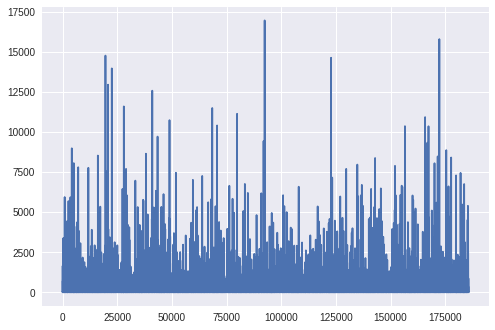

In [29]:
plt.plot(train['Ratings'])

In [30]:
desc=train.describe().T
desc['1%']=train.quantile(.01)
desc['5%']=train.quantile(.05)
desc['95%']=train.quantile(.95)
desc['99%']=train.quantile(.99)
desc['Q3-Q1']=desc['75%']-desc['25%']
desc['UB']=desc['75%']+(desc['Q3-Q1']*1.5)
desc['LB']=desc['25%']-(desc['Q3-Q1']*1.5)
desc=desc.loc[:,['count','mean','std','min','1%','5%','25%','50%','75%','95%','99%','max','Q3-Q1','LB','UB']]
desc

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,Q3-Q1,LB,UB
ABV,173977.0,6.307734,1.845498,0.01,3.30,4.1,5.00,6.00,7.00,10.0,12.00,80.0,2.00,2.000,10.000
Brewing Company,173977.0,7003.505785,3915.156961,0.00,112.00,572.0,3795.00,7102.00,10402.00,12874.0,13389.00,13541.0,6607.00,-6115.500,20312.500
Beer Name,173977.0,83582.227093,48598.681639,0.00,1933.52,8316.8,41455.00,82856.00,125528.00,160150.0,166687.24,168534.0,84073.00,-84654.500,251637.500
Ratings,173977.0,33.182271,257.127284,0.00,0.00,0.0,1.00,2.00,7.00,85.2,612.00,16954.0,6.00,-8.000,16.000
Cellar Temperature,173977.0,1.933646,0.687271,1.00,1.00,1.0,1.00,2.00,2.00,3.0,3.00,3.0,1.00,-0.500,3.500
Serving Temperature,173977.0,2.859757,0.642298,1.00,2.00,2.0,2.00,3.00,3.00,4.0,4.00,4.0,1.00,0.500,4.500
Score,173977.0,3.195450,1.358852,0.00,0.00,0.0,3.26,3.71,3.97,4.3,4.54,5.0,0.71,2.195,5.035


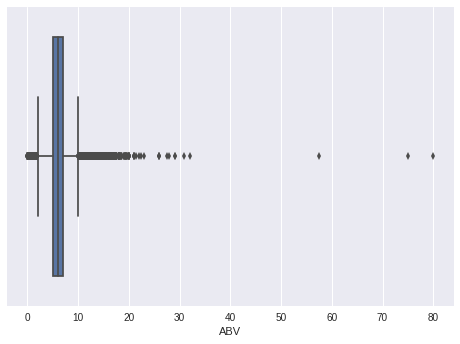

In [31]:
sns.boxplot(x= 'ABV',data=train)

In [0]:
outlier= train[train['ABV']>10.5]

In [33]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 9 to 185520
Data columns (total 10 columns):
ABV                    5112 non-null float64
Brewing Company        5112 non-null int64
Food Paring            5112 non-null object
Glassware Used         5112 non-null object
Beer Name              5112 non-null int64
Ratings                5112 non-null int64
Style Name             5112 non-null object
Cellar Temperature     5112 non-null int64
Serving Temperature    5112 non-null int64
Score                  5112 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 439.3+ KB


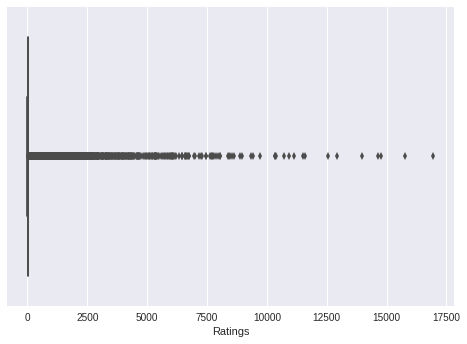

In [34]:
sns.boxplot(x= 'Ratings',data=train)

rat_out = train[train['Ratings']>85]

In [35]:
rat_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 10 to 185617
Data columns (total 10 columns):
ABV                    8699 non-null float64
Brewing Company        8699 non-null int64
Food Paring            8699 non-null object
Glassware Used         8699 non-null object
Beer Name              8699 non-null int64
Ratings                8699 non-null int64
Style Name             8699 non-null object
Cellar Temperature     8699 non-null int64
Serving Temperature    8699 non-null int64
Score                  8699 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 747.6+ KB


In [0]:
train = train[train['ABV']<10.5]

In [0]:
train = train[train['Ratings']<86]

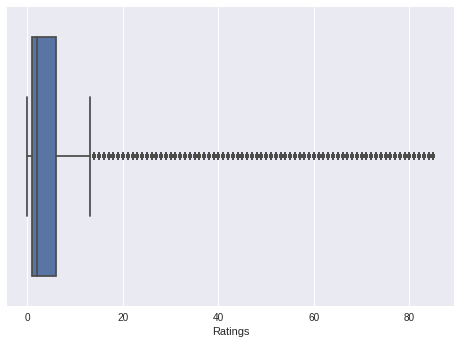

In [38]:
sns.boxplot(x= 'Ratings',data=train)

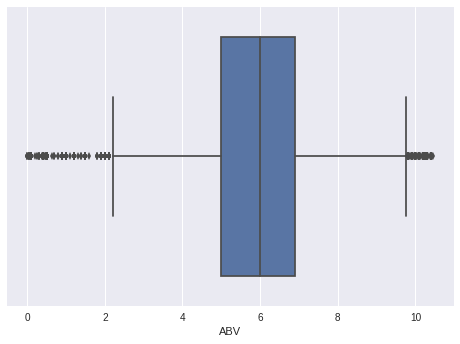

In [39]:
sns.boxplot(x= 'ABV',data=train)

In [40]:
train.corr()

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
ABV,1.000000,-0.002118,-0.023854,0.052795,0.467914,0.466343,0.119785
Brewing Company,-0.002118,1.000000,0.073974,-0.000774,-0.001041,0.002905,0.012966
Beer Name,-0.023854,0.073974,1.000000,0.005204,-0.001982,-0.005742,-0.003660
Ratings,0.052795,-0.000774,0.005204,1.000000,0.024787,0.021884,0.220201
Cellar Temperature,0.467914,-0.001041,-0.001982,0.024787,1.000000,0.864132,0.099544
Serving Temperature,0.466343,0.002905,-0.005742,0.021884,0.864132,1.000000,0.106895
Score,0.119785,0.012966,-0.003660,0.220201,0.099544,0.106895,1.000000


In [0]:
X= train.drop(['Brewing Company','Beer Name','Food Paring','Score','Style Name','Glassware Used'],axis=1)
Y= train['Score']

In [42]:
X.head()

,ABV,Ratings,Cellar Temperature,Serving Temperature
0,6.5,22,2,3
1,5.5,1,1,2
2,8.1,3,1,2
3,6.0,0,1,1
4,6.0,1,1,2


In [0]:
def ohe(cl):
  global train
  col=pd.get_dummies(train[cl],prefix=cl)
  train=pd.concat([train,col],axis=1)
  train=train.drop(cl,axis=1)
  
  
#ohe('Style Name')
ohe('Cellar Temperature')
ohe('Serving Temperature')
#ohe('Food Paring')
#ohe('Glassware Used')

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
# Predicting the Test set results
y_pred_linear = regressor.predict(X_test)

In [47]:
print(regressor.score(X_test,y_test))

0.06536683391158804


In [48]:
from sklearn.metrics import mean_squared_error
E=mean_squared_error(y_test,y_pred_linear)
print(np.sqrt(E))

1.3383725134469842


In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_random = regressor1.predict(X_test)

In [51]:
y_test

144847    4.35
89794     3.66
143179    3.45
111881    3.02
70004     4.08
140668    4.24
41943     4.09
161039    4.14
175117    2.66
5923      3.71
179988    3.78
176420    3.62
18100     3.63
15041     3.76
159551    3.95
172657    2.51
53379     4.75
10073     3.75
107799    3.45
75261     3.64
141112    0.00
153137    3.64
50962     0.00
150159    2.85
5290      3.61
70880     0.00
172556    4.25
117445    0.00
1614      3.08
163303    0.00
          ... 
132768    4.23
169710    3.81
34554     3.80
163279    3.38
157211    0.00
80601     3.79
161303    4.00
65097     3.19
158280    3.54
128849    3.50
127104    4.03
18900     3.00
84660     0.00
157993    2.50
58406     3.94
150936    0.00
128245    2.87
119511    0.00
130338    0.00
52214     3.20
175692    3.81
82983     3.84
49406     3.88
114417    3.77
129684    3.25
76488     3.49
175747    0.00
37637     3.84
174492    4.03
63891     0.00
Name: Score, Length: 31993, dtype: float64

In [52]:
y_pred_random

array([4.012467  , 3.4943922 , 3.67280744, ..., 3.80446884, 3.94879765,
       0.        ])

In [53]:
from sklearn.metrics import mean_squared_error
E=mean_squared_error(y_test,y_pred_random)
print(np.sqrt(E))

0.3938826739556381


In [54]:
print(regressor1.score(X_test,y_test))

0.9190492408878147


In [55]:
np.mean((np.abs(y_test- y_pred_random))/y_test)*100

9.37951102253743

In [56]:
np.mean((np.abs(y_test- y_pred_linear))/y_test)*100

inf

In [57]:
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 50,75,100]
}

rf = RandomForestRegressor()

In [0]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [61]:
# Fit the grid search to the data
grid_search.fit(X,Y)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, total=   4.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=75 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50, total=   4.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=75 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=75, total=   6.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=75 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=75, total=   6.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.1min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   5.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=75 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=75, total=   9.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=75 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=75, total=   8.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=75, total=   8.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_sa

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 17.6min


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=10, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   8.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, total=   1.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_le

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 31.7min


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20, total=   1.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  bootstrap=True, max_depth=100, max_features=2,

[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 40.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [10, 20, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [62]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [0]:
best_grid = grid_search.best_estimator_


In [65]:
grid_search.grid_scores_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


0.9230723189240876
{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [0]:
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [0]:
y_pred_final = final_model.predict(X_test)

In [69]:
#RMSE for the final model
from sklearn.metrics import mean_squared_error
E=mean_squared_error(y_test,y_pred_final)
print(np.sqrt(E))

0.3881362988174766
